In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

In [2]:
## Use brown corpus instead of text
text = "the cat sat on the mat the dog sat on the log"

In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # Adding 1 for padding
word_index

{'the': 1, 'sat': 2, 'on': 3, 'cat': 4, 'mat': 5, 'dog': 6, 'log': 7}

In [4]:
sequences = []
words = text.split()

for i in range(1, len(words)):
    sequences.append(words[:i+1])

sequences

[['the', 'cat'],
 ['the', 'cat', 'sat'],
 ['the', 'cat', 'sat', 'on'],
 ['the', 'cat', 'sat', 'on', 'the'],
 ['the', 'cat', 'sat', 'on', 'the', 'mat'],
 ['the', 'cat', 'sat', 'on', 'the', 'mat', 'the'],
 ['the', 'cat', 'sat', 'on', 'the', 'mat', 'the', 'dog'],
 ['the', 'cat', 'sat', 'on', 'the', 'mat', 'the', 'dog', 'sat'],
 ['the', 'cat', 'sat', 'on', 'the', 'mat', 'the', 'dog', 'sat', 'on'],
 ['the', 'cat', 'sat', 'on', 'the', 'mat', 'the', 'dog', 'sat', 'on', 'the'],
 ['the',
  'cat',
  'sat',
  'on',
  'the',
  'mat',
  'the',
  'dog',
  'sat',
  'on',
  'the',
  'log']]

In [5]:
input_sequences = tokenizer.texts_to_sequences([" ".join(seq) for seq in sequences])
input_sequences

[[1, 4],
 [1, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 2, 3, 1],
 [1, 4, 2, 3, 1, 5],
 [1, 4, 2, 3, 1, 5, 1],
 [1, 4, 2, 3, 1, 5, 1, 6],
 [1, 4, 2, 3, 1, 5, 1, 6, 2],
 [1, 4, 2, 3, 1, 5, 1, 6, 2, 3],
 [1, 4, 2, 3, 1, 5, 1, 6, 2, 3, 1],
 [1, 4, 2, 3, 1, 5, 1, 6, 2, 3, 1, 7]]

In [6]:
X = [seq[:-1] for seq in input_sequences]
y = [seq[-1] for seq in input_sequences]

X[2],y[2]

([1, 4, 2], 3)

In [7]:
X = pad_sequences(X, maxlen=5)  # Padding sequences to fixed length
y = np.array(y) - 1  # Convert to zero-based index

X

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 4],
       [0, 0, 1, 4, 2],
       [0, 1, 4, 2, 3],
       [1, 4, 2, 3, 1],
       [4, 2, 3, 1, 5],
       [2, 3, 1, 5, 1],
       [3, 1, 5, 1, 6],
       [1, 5, 1, 6, 2],
       [5, 1, 6, 2, 3],
       [1, 6, 2, 3, 1]], dtype=int32)

In [8]:
#Update the model with more  embedding dimension, and arch with more depth (more hidden layers)
from tensorflow.keras.layers import GlobalAveragePooling1D

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=32),
    GlobalAveragePooling1D(), # Use GlobalAveragePooling1D instead of Flatten
    Dense(10, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

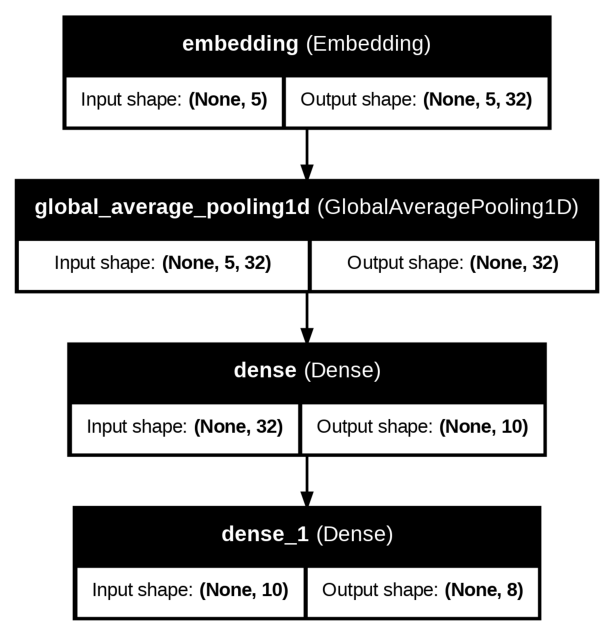

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import plot_model

model.build(input_shape=(None, 5)) # Build the model with the appropriate input shape
plot_model(model, to_file="model_architecture.png", show_shapes=True, show_layer_names=True)

# Display the model architecture image
img = mpimg.imread("model_architecture.png")
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.show()

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 2.0804
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0000e+00 - loss: 2.0766
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.0000e+00 - loss: 2.0728
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0909 - loss: 2.0692
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0909 - loss: 2.0659
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0909 - loss: 2.0627
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.1818 - loss: 2.0595
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.2727 - loss: 2.0561
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2727 - loss: 2.0527
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2727 - loss: 2.0492
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2727 - loss: 2.0456
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0

In [13]:
def predict_next_word(partial_text):
    sequence = tokenizer.texts_to_sequences([partial_text])
    sequence = pad_sequences(sequence, maxlen=5)
    predicted_index = np.argmax(model.predict(sequence), axis=-1)[0]
    for word, index in word_index.items():
        if index == predicted_index + 1:
            return word
    return "unknown"

In [14]:
print(predict_next_word("sat"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
sat


In [15]:
#Evaluate the model using perplexity

# Task



1.   Modify the above program using any of the standard corpus available in NLTK
2.   Evaluate the model using perplexity measure



In [16]:
import nltk
from nltk.corpus import brown
nltk.download('brown')
nltk.download('punkt')

sentences = brown.sents()[:2000]
text = ' '.join([' '.join(sent) for sent in sentences])
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

sequences = []
for line in sentences:
    encoded = tokenizer.texts_to_sequences([' '.join(line)])[0]
    for i in range(2, len(encoded)):
        sequences.append(encoded[:i])

max_len = min(10, max(len(x) for x in sequences))
sequences = [x[-max_len:] for x in sequences]
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

X, y = sequences[:,:-1], sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_len-1))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=3, batch_size=128, verbose=1)


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.0570 - loss: 8.0835
Epoch 2/3
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.0706 - loss: 6.8281
Epoch 3/3
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.0832 - loss: 6.6419


In [17]:
import numpy as np
loss = model.evaluate(X, y, verbose=0)
perplexity = np.exp(loss[0])
print("Perplexity:", perplexity)


Perplexity: 636.0068000710047
